## Registros de votación del Congreso de los Estados Unidos en el año 1984
##### Clasificar como republicano o demócrata ( Clasificación Supervisada )
Méndez Pool Joan de Jesús | 160300102

<p  style="text-align:justify" >El objetivo del proyecto es comparar diferentes técnicas para resolver un problema de clasificación binario sobre el conjunto de datos de los <i>Registros de votación del Congreso de los Estados Unidos en el año 1984</i>, Este conjunto de datos incluye votos para cada una de las cámaras de <i>Representantes congresistas</i> sobre los 16 votos clave identificados por el CQA. La CQA enumera nueve tipos diferentes de votos: <i> voted for (votados para), paired for (emparejados para), y announced for (anunciado para )</i> (estos tres son simplificados a la categoría <i>sí</i>), <i>voted agains (votaron en contra), paired against (emparejado en contra) y announced against (anunciado en contra) (estos tres simplificado a la categoría <i>no</i>), voted present (votó presente), voted present to avoid conflict of interest (votó presente para evitar conflictos de interés), y no votó ni dio a conocer una posición</i> (estos tres simplificados a una disposición <i>desconocida</i>).<br><br>
Los atributos que contiene el conjunto de datos son los siguientes: </p>
<ol>
   <li> Class Name: 2 clases (democrat, republican)</li>
   <li> handicapped-infants: 2 clases (y,n)</li>
   <li> water-project-cost-sharing: 2 clases (y,n)</li>
   <li> adoption-of-the-budget-resolution: 2 clases (y,n)</li>
   <li> physician-fee-freeze: 2 clases (y,n)</li>
   <li> el-salvador-aid: 2 clases (y,n)</li>
   <li> religious-groups-in-schools: 2 clases (y,n)</li>
   <li> anti-satellite-test-ban: 2 clases (y,n)</li>
   <li> aid-to-nicaraguan-contras: 2 clases (y,n)</li>
   <li> mx-missile: 2 clases (y,n)</li>
   <li> immigration: 2 clases (y,n)</li>
   <li> synfuels-corporation-cutback: 2 clases (y,n)</li>
   <li> education-spending: 2 clases (y,n)</li>
   <li> superfund-right-to-sue: 2 clases (y,n)</li>
   <li> crime: 2 (y,n)</li>
   <li> duty-free-exports: 2 clases (y,n)</li>
   <li> export-administration-act-south-africa: 2 clases (y,n)</li>
</ol>
 
<p  style="text-align:justify" >La variable de respuesta es <i>"Class Name"</i>, el resto de las variables son predictoras, observamos que todas las variables son categóricas. Por medio de las técnicas de clasificación conocidas como <i>K - Nearest Neighbors</i>, <i>Logistic Regression</i>, <i>Neural Network</i>, <i>Support Vector Machine</i>, <i>Decision Tree</i> y <i>Naive Bayes</i> debemos predecir si congresista pertene al partido republicano o al partido demócrata de acuerdo a los vatos realizados de sus semejantes sobre las propuestas del congreso del 84'</p> 

### Antecedentes

Publicaciones anteriores:
     1. Schlimmer, J. C. (1987).  Concept acquisition through 
        representational adjustment.  Doctoral dissertation, Department of 
        Information and Computer Science, University of California, Irvine, CA.
      - Resultados: aproximadamente 90% -95% de precisión parece ser un escalonamiento asintótico.
      - Atributo previsto: afiliación partidaria (2 clases).
     
     
<p  style="text-align:justify" >El proyecto fue realizado en <i>Python</i> con los módulos de <i>sklearn</i> para construir los modelos clasificadores a comparar sobre el conjunto de datos de <i>house-votes-84.data</i>.</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
# Sklearn library
from sklearn.pipeline import Pipeline
# Proyectar los componentes en un espacio de dos dimensiones
from sklearn.decomposition import PCA
# Procesar el escalamiento de datos
from sklearn.preprocessing import StandardScaler, scale
# Separación de conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split
# Métricas
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Interación de modelos de entrenamiento
from sklearn.model_selection import GridSearchCV
# K - Vecinos más cercanos
from sklearn.neighbors import KNeighborsClassifier
# Regresión logistica
from sklearn.linear_model import LogisticRegression
# Redes Neuronales
from sklearn.neural_network import MLPClassifier
# Maquina de Soporte Vectorial
from sklearn.svm import SVC
# Arboles de Decision
from sklearn.tree import DecisionTreeClassifier
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# ROC Curve ( Característica Operativa del Receptor)
from sklearn.metrics import roc_curve

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


## Marco teórico

#### $K$ - Vecinos más Cercanos

<p style="text-align:justify;">

El $K$-NN ($K$-Nearest Neighbor) es un algoritmo de aprendizaje supervisado,  el algoritmo trabaja a partir de un conjunto de datos inicial, el objetivo será el de clasificar correctamente todas las instancias nuevas. El conjunto de datos típico de este tipo de algoritmos está formado por varios atributos descriptivos y un solo atributo objetivo (también denominado clase).
<br>   
El algoritmo clasifica cada dato nuevo en el grupo que corresponda, según tenga $k$ vecinos más cercanos de un grupo o de otro. Se encarga de calcular la distancia de cada elemento nuevo a cada uno de los existentes, y ordena dichas distancias de menor a mayor para ir seleccionando el grupo a clasificar. Este grupo será el de mayor frecuencia con menores distancias.
</p>


<p style="text-align:center;">
    <img src="./knn.png"
         alt="K-NN"/><br>
    <em>Fig. 1: <i>$K$-Nearest Neighbor algorithm</i> </em>
</p>

#### Regresión Logística

La regresión logística es una técnica de aprendizaje supervisado para clasificación binaria, aunque se puede adaptar a problemas de clasificaciín multiclase.

Se supone que se dispone de un conjunto de datos, en los cuales la etiqueta $y_i \in \{-1, 1\}$:

\begin{bmatrix}
    x_{10} & x_{11} & x_{12} & \cdots & x_{1d} & \color{red}{y_1}\\ 
    x_{10} &x_{21} & x_{22} & \cdots & x_{2d} & \color{red}{y_2}\\ 
    \vdots & \vdots & \vdots & \cdots & \vdots & \color{red}{\vdots}\\ 
    x_{N0} & x_{N1} & x_{N2} & \cdots & x_{Nd} & \color{red}{y_N}\\ 
\end{bmatrix}

En la regresión logística se ajusta un modelo lineal a la razón entre las dos probabilidades de clase: 

$$\ln\left[\frac{P(Y = 1 | X = x)}{P(Y = -1 | X = x)}\right] = \color{red}{\alpha^{T}x}$$

Siendo $\alpha = [\alpha_0, \alpha_1, \alpha_2, \ldots, \alpha_d]^{T}$ el vector de coeficientes del modelo lineal

<font color="blue">Observación</font>

En la regresión logística no se establece la condición de que las observaciones provengan de distribuciones gaussianas multivariadas.

##### Función Sigmoide

Se puede despejar la probabilidad $P(Y = 1 | X = x)$ del modelo lineal:

$$P(Y = 1 | X = x) = \frac{e^{\alpha^{T}x}}{1+e^{\alpha^{T}x}} = \sigma(\alpha^{T}x)$$

La función $\sigma()$ es una función **sigmoide**. 

<p style="text-align:center;">
    <img src="./sigmoid.png"
         alt="Función Sigmoide"/><br>
    <em>Fig. 2: <i>Sigmoid Function</i> </em>
</p>

#### Redes Neuronales

###### Perceptrón


Un perceptrón es un clasificador que permite ajustar regiones lineales para separar observaciones de diferentes clases. 

El modelo del perceptrón es el siguiente:

$$y = s(\alpha_0 + \alpha_1x_1+\cdots+\alpha_dx_d)$$



La siguiente imagen es una representación gráfica del perceptrón

<p style="text-align:center;">
    <img src="perceptron.png" width=500px;
         alt="Perceptron"/><br>
    <em>Fig. 3: <i>Perceptron</i> </em>
</p>

Los coeficientes (o pesos) deben determinarse minimizando la suma de errores al cuadrado:

$$E(\alpha_0, \alpha_1, \ldots, \alpha_d) = \sum_i [y_i-s(\alpha_0 + \alpha_1x_{i1}+\cdots+\alpha_dx_{id})]^2$$

Sin embargo, dado que la función signo, $s(x)$, no es derivable, por lo que para encontrar los pesos que minimicen la suma de errores es necesario utilizar un algoritmo iterativo, inspirado en el algoritmo de **descenso de gradiente**, que es muy sensible a los óptimos locales, por lo que su aplicación se dificulta en problemas de clasificación de grandes dimensiones (vectores de características con muchas componentes).

###### Perceptrón (salida derivable)

Dado que no se puede derivar la función signo se limita la aplicación de algún método de optimización sofisticado, pues estos metodos generalmente se basan en la evaluación y aplicación del gradiente de la función a minimizar. 

Una primera adecuación al perceptrón consiste entonces en colocar a la salida una función derivable que aproxime a la función signo. A este tipo de funciones se les denomina **sigmoides**.

###### Multiperceptrones

Un perceptrón permite *aprender* funciones lógicas básicas como las siguientes:

* **OR**. Considera los siguientes pesos: $\alpha_0 = -1, \alpha_1=1, \alpha_2=1$
* **AND**. Con $$\alpha_0 = -2, \alpha_1=1, \alpha_2=1$$
* **NAND**. Con $$\alpha_0 = 2, \alpha_1=-1, \alpha_2=-1$$
* ¿**XOR**?

Un perceptrón no puede utilizarse para aprender la función **XOR**, sin embargo, sí es posible hacerlo por medio de dos perceptrones: **XOR = (OR) AND (NAND)** 



#### Red Neuronal

Una red neuronal es un conjunto de capas de perceptrones conectadas en serie:

<p style="text-align:center;">
    <img src="red_neuronal.jpeg" width=400px;
         alt="Función Sigmoide"/><br>
    <em>Fig. 4: <i>Neural Network</i> </em>
</p>

La red neuronal permite extender las aplicaciones de los perceptrones simples considerando lo siguiente:

* A los elementos de la capa de entrada se conectan las componentes de un vector de características.
* Las capas intermedias permiten realizar transformaciones no-lineales muy generales a las variables originales.
* El tener múltiples perceptrones en la capa de salida permite la aplicación de las redes neuronales en problemas de clasificación con un número arbitrario de etiquetas.
* El entrenamiento de la red neuronal se realiza mediante la minimización de la suma de erroes al cuadrado utilizando algún método basado en  gradiente.
* Si la optimizaciónse realiza por medio de descenso de gradiente, entonces al algoritmo se le llama <b>retropropagación</b> (backpropagation).


#### Máquinas de soporte Vectorial

Máquinas de soporte Vectorial (Suporter Vector Machine en inglés), es una técnica conocida técnica moderna y efectiva del campo de la Inteligencia Artificial, aplicada fundamentalmente al procesamiento de grandes cantidades de información.

Las Máquinas de Soporte Vectorial (MSV) han tenido un formidable desarrollo en los últimos años.

 Se presentarán los fundamentos teóricos que definen estos sistemas de aprendizaje:
<ul>
    <li>Uno de los conceptos fundamentales en esta técnica es el algoritmo Vector de Soporte (VS) es una generalización no-lineal del algoritmo Semblanza Generalizada, desarrollado en la Rusia en los años sesenta. El desarrollo de los VS trae consigo el surgimiento de las Máquinas de Soporte Vectorial. Estas son sistemas de aprendizaje que usan un espacio de hipótesis de funciones lineales en un espacio de rasgos de mayor dimensión, entrenadas por un algoritmo proveniente de la teoría de optimización.</li><br>

<li>La Minimización del Riesgo Empírico y la [Dimensión de Vapnik-Chervonenkis] son fundamentales en las Máquinas de Soporte Vectorial. Dicho de manera más sencilla el algoritmo se enfoca en el problema general de aprender a discriminar entre miembro positivos y negativos de una clase de vectores de n-dimensional dada.</li><br>

<li>Las MSV pertenecen a la familia de clasificadores lineales. Mediante una función matemática denominada kernel, los datos originales se redimensionan para buscar una separabilidad lineal de los mismos. Una característica de las MSV es que realiza un mapeo de los vectores de entrada para determinar la linealidad o no de los casos los cuales serán integrados a los Multiplicadores de Lagrange para minimizar el Riesgo Empírico y la Dimensión de Vapnik-Chervonenkis. De manera general, las Máquinas de Soporte Vectorial permiten encontrar un hiperplano óptimo que separe las clases.</li><br>
</ul>

##### Kernel

Las funciones kernel son funciones matemáticas que se emplean en las Máquinas de Soporte Vectorial. Estas funciones son las que le permiten convertir lo que sería un problema de clasificación no-lineal en el espacio dimensional original, a un sencillo problema de clasificación lineal en un espacio dimensional mayor.

<p style="text-align:center;">
    <img src="SVM.png"
         alt="SVM"/><br>
    <em>Fig. 5: <i>Support Vector Machine</i> </em>
</p>


#### Árboles de Decisión

Classification And Regression Tree (CART) son un tipo de algoritmos de aprendizaje supervisado (tiene como objetivo una variable predefinida). Son principalmente usados en problemas de clasificación, las variables de entrada y salida pueden ser variables categóricas o variables continuas. El algoritmo divide el espacio de predictores (variables independientes) en regiones distintas y no sobrepuestas. Este enfoque fue desarrollado por Breiman et al. (1984).

Generalizando:

$$SSS = \sum_{m=1}^{M} \sum_{i \in {R_m}}^{} ( y_i - \hat{y_{R_m}})^{2}  $$


Se divide la población o muestra en conjuntos homegéneos basados en la variable de entrada más significativa. La construcción del árbol sigue un enfoque de división binaria recursiva (top-down greddy approach). Greedy -> analiza la mejor variable para ramificación sólo en el proceso de división actual.

<p style="text-align:center;">
    <img src="cart.png"
         alt="CART"/><br>
    <em>Fig. 6: <i>Classification And Regression Tree</i> </em>
</p>


#### Teorema de Naive Bayes

Un clasificador Naive Bayes es un clasificador probabilístico fundamentado en el teorema de Bayes y algunas hipótesis simplificadoras adicionales. Es a causa de estas simplificaciones, que se suelen resumir en la hipótesis de independencia entre las variables predictoras, que recibe el apelativo de naive, es decir, ingenuo. 

El Clasificador de Naive Bayes asume que la presencia o ausencia de una característica particular no está relacionada con la presencia o ausencia de cualquier otra de las características, dada la clase variable.

**Teorema de Bayes**:

$$ P(y\mid X) = \displaystyle \frac{P(X\mid y)P(y)}{P(X)}$$

<p style="text-align:justify">Usando el teorema de Bayes, podemos encontrar la probabilidad de que ocurra $y$, dado que $X$ ha ocurrido. Observamos que $X$ es la evidencia e $y$ es la hipótesis. La suposición hecha aquí es que los predictores son independientes. Es decir, la presencia de una característica particular no afecta a la otra. Por eso se llama ingenuo.</p>

##### Tipos de clasificador ingenuo de Bayes:

###### Bayes ingenuos multinomiales:

<p style="text-align:justify">Esto se usa principalmente para problemas de clasificación de documentos, es decir, si un documento pertenece a la categoría de deportes, política, tecnología, etc. Las características utilizadas por el clasificador son la frecuencia de las palabras presentes en el documento.</p>

###### Bernoulli ingenuo Bayes:

<p style="text-align:justify">Esto es similar a las bayes ingenuas multinomiales, pero los predictores son variables booleanas. Los parámetros que usamos para predecir la variable de clase solo toman valores sí o no, por ejemplo, si una palabra aparece en el texto o no.</p>

###### Bayes ingenuos gaussianos:

<p style="text-align:justify">Cuando los predictores toman un valor continuo y no son discretos, suponemos que estos valores se muestrean a partir de una distribución gaussiana.</p>

<p style="text-align:center;">
    <img src="bayes.jpeg"
         alt="Naive Bayess"/><br>
    <em>Fig. 7: <i>Naive Bayes Theorem</i> </em>
</p>

### Carga del Conjunto Datos

<p  style="text-align:justify" >Cargamos el conjunto de datos de <i>house-votes-84.data</i> para visualizar cuales son nuestras variables predictoras y hacer una observación sobre la variable categórica.</p>

In [2]:
data = pd.read_csv("house-votes-84.data", header=None)
colsname = [ line.replace("\n", "") for line in open("house-votes-84-headers.data").readlines() ]
data.columns = colsname
print("Dataframe shape: {} rows x {} columns".format(data.shape[0], data.shape[1]))
data.head(10)


Dataframe shape: 435 rows x 17 columns


,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
6,democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
9,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?


<p style="text-align:justify;">
</p>

<p style="text-align:justify;">
Ahora procedemos a observar la información de nuestro conjunto de datos, como por ejemplo el tipo de dato, el número de entradas, el total de columnas, y si el conjunto de datos posee datos nulos.
</p>

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
Class Name                                435 non-null object
handicapped-infants                       435 non-null object
water-project-cost-sharing                435 non-null object
adoption-of-the-budget-resolution         435 non-null object
physician-fee-freeze                      435 non-null object
el-salvador-aid                           435 non-null object
religious-groups-in-schools               435 non-null object
anti-satellite-test-ban                   435 non-null object
aid-to-nicaraguan-contras                 435 non-null object
mx-missile                                435 non-null object
immigration                               435 non-null object
synfuels-corporation-cutback              435 non-null object
education-spending                        435 non-null object
superfund-right-to-sue                    435 non-null object
crime                      

### Descripción de las características
<p  style="text-align:justify" >Realizamos un resumen de las  para conocer sus medidas estadísticas, ya que las variables son categóricas obtenemos solamente la cantidad de datos, cuantos valores únicos posee, el valor que más se repite en cada columna y la frecuencia de dicho término.</p>

In [4]:
data.describe()


,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


<p style="text-align:justify">Procedemos a eliminar los valores no conocidos en este caso están denominados por la etiqueta <i>'?'</i>, remplazamos lo datos con la constante de valores no asignados ("NA"). Por lo que lo siguiente es eliminar todas las observaciones con campos no asignados una vez aplicado el filtro.</p>

In [5]:
data = data.replace("?", np.nan)
data = data.dropna()
print("New Dataframe shape: {} rows x {} columns".format(data.shape[0], data.shape[1]))
data.info()


New Dataframe shape: 232 rows x 17 columns
<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 5 to 431
Data columns (total 17 columns):
Class Name                                232 non-null object
handicapped-infants                       232 non-null object
water-project-cost-sharing                232 non-null object
adoption-of-the-budget-resolution         232 non-null object
physician-fee-freeze                      232 non-null object
el-salvador-aid                           232 non-null object
religious-groups-in-schools               232 non-null object
anti-satellite-test-ban                   232 non-null object
aid-to-nicaraguan-contras                 232 non-null object
mx-missile                                232 non-null object
immigration                               232 non-null object
synfuels-corporation-cutback              232 non-null object
education-spending                        232 non-null object
superfund-right-to-sue                    232 

<p style="text-align:justify;">
    Ahora observamos que nos quedamos solo con 232 observaciones, los cuales están listos para aplicar los metodos de clasificación. Ahora describimos la información para observar si existe un cambio significativo en la frecuencia de cada termino para cada columna.
</p>

In [6]:
data.describe()


,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,n,n,y,n,y,y,y,y,n,y,n,n,y,y,n,y
freq,124,136,125,123,119,128,149,124,119,119,128,152,124,127,149,146,189


<p style="text-align:justify;">
Aún no se puede aplicar por completo los modelos de clasificación ya que los algoritmos no trabajan con valores de tipo <i>character</i> por lo que se debe realizar un procesamiento, para realizar está tarea se usa el método <i>get_dummies</i>, la función convierte las columnas con valores categóricos en indicadores binarios, donde cada combinación de secuencias binarias representa una clase.
</p>

In [7]:
data_dummies = pd.get_dummies(data, drop_first=True)
data_dummies.head()


,Class Name_republican,handicapped-infants_y,water-project-cost-sharing_y,adoption-of-the-budget-resolution_y,physician-fee-freeze_y,el-salvador-aid_y,religious-groups-in-schools_y,anti-satellite-test-ban_y,aid-to-nicaraguan-contras_y,mx-missile_y,immigration_y,synfuels-corporation-cutback_y,education-spending_y,superfund-right-to-sue_y,crime_y,duty-free-exports_y,export-administration-act-south-africa_y
5,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,0,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,0,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


<p style="text-align:justify">
    Los algoritmos de clasificación supervisada del módulo <i>scikit-learn</i> reciben dos entradas, el vector de características y el vector de etiquetas, por lo que debemos separar estas en dos variables que serán conocidas como $Y$ para la variable categórica <i>Class Name</i> y $X$ para nuestras variables predictoras.
</p>

In [8]:
# Dataframe dummie copy
Y = data_dummies["Class Name_republican"]
data_dummies = data_dummies.drop(['Class Name_republican'], axis=1)
X = data_dummies.copy(deep=True)
X.describe()


,handicapped-infants_y,water-project-cost-sharing_y,adoption-of-the-budget-resolution_y,physician-fee-freeze_y,el-salvador-aid_y,religious-groups-in-schools_y,anti-satellite-test-ban_y,aid-to-nicaraguan-contras_y,mx-missile_y,immigration_y,synfuels-corporation-cutback_y,education-spending_y,superfund-right-to-sue_y,crime_y,duty-free-exports_y,export-administration-act-south-africa_y
count,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000
mean,0.413793,0.461207,0.530172,0.487069,0.551724,0.642241,0.534483,0.512931,0.487069,0.551724,0.344828,0.465517,0.547414,0.642241,0.370690,0.814655
std,0.493577,0.499571,0.500168,0.500913,0.498393,0.480377,0.499888,0.500913,0.500913,0.498393,0.476340,0.499888,0.498823,0.480377,0.484034,0.389417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<p style="text-align:justify;">

</p>

## Separar los datos en conjuntos de entrenamiento y prueba

<p  style="text-align:justify" >A continuación realizamos la separación del conjunto de datos en dos subconjuntos, el conjunto de entrenamiento se encarga de la construcción de los clasificadores, y el conjunto de prueba es para evaluar la precisión de nuestro modelo de clasificación. Nuestro conjunto de entrenamiento contiene 75% de la información y el conjunto de prueba 25% de la información, con una semilla de valor 124 para siempre obtener los mismos resultados en la separación de los datos.</p>

In [9]:
# Separación de conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=124)
print("Cantidad de datos en el conjunto de Entrenamiento: {}".format(X_train.count()[0]))
print("Cantidad de datos en el conjunto de Prueba: {}".format(X_test.count()[0]))


Cantidad de datos en el conjunto de Entrenamiento: 174
Cantidad de datos en el conjunto de Prueba: 58


# K - Nearest Neighbors

<p  style="text-align:justify" >Aplicamos el método de vecinos más cercanos por medio del clasificador <i>KNeighborsClassifier()</i> obtenido de los módulos de <i>sklearn</i>, construimos un <i>Pipeline</i>, primero con el comando de escalamiento de datos para posteriormente aplicar el clasificador, definimos nuestros parámetros del clasificador para realizar una búsqueda exhaustiva con validación cruzada, con un valor de $k=10$, para realizar la búsqueda utilizamos el comando <i>GridSearchCV()</i> proveniente de los módulos de <i>sklearn</i> para realizar un algoritmo de validación cruzada con el fin de obtener los mejores parámetros para nuestro modelo de clasificación.</p>
<p  style="text-align:justify" >Después de realizar la validación cruzada de parámetros debemos entrenar nuestro modelo con el conjunto de datos de entrenamiento.</p>

In [10]:
# Pipeline
steps = [('scaler', StandardScaler()), 
         ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
# Hyperparameters
parameters = {'knn__n_neighbors': list(range(1,8)),
              'knn__weights': ["uniform", "distance"]}

# Cross Validation
knn_cv = GridSearchCV(pipeline, parameters, cv=10)
# Fit Model
knn_cv.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
          

In [11]:
print("Mejores Parámetros del modelo: {}".format(knn_cv.best_params_))


Mejores Parámetros del modelo: {'knn__n_neighbors': 4, 'knn__weights': 'uniform'}


<p  style="text-align:justify" >Función para visualizar la matriz de confusión.</p>

#### Métricas de Evaluación de Clasificación (Confusion Matrix, Accuracy, Precision, Recall, F1, ROC y AUC)

<ul>
 
<li><p  style="text-align:justify" >Una matriz de confusión es una tabla que describe el desempeño de un modelo de clasificación en un conjunto de datos de prueba cuyos valores verdaderos son conocidos. Una matriz de confusión es altamente interpretativa y puede ser usada para estimar un número de otras métricas.</p></li>
    
<p style="text-align:center;">
    <img src="confusion_matrix.png"
         alt="Confusion Matrix"/><br>
    <em>Fig. 8: <i>Confusion Matrix</i> </em>
</p>
<br>
<li><p  style="text-align:justify" >La exactitud de la clasificación es la relación entre las predicciones correctas y el número total de predicciones. O más simplemente, con qué frecuencia es correcto el clasificador.<br>La fórmula de la exactitud esta definida por:</p></li>

$$Accuracy = \displaystyle \frac{TP + TN}{TP + FP + FN + TN}$$<br>
    
<li><p  style="text-align:justify" >La precisión es la relación entre las predicciones correctas y el número total de predicciones correctas previstas. Esto mide la precisión del clasificador a la hora de predecir casos positivos.<br>La fórmula de la precisión esta definida por:</p></li>

$$Precision = \displaystyle \frac{TP}{TP + FN}$$<br>
    

<li><p  style="text-align:justify" >La sensibilidad también es llamada en inglés recall, es la relación entre las predicciones positivas correctas y el número total de predicciones positivas. O más simplemente, cuán sensible es el clasificador para detectar instancias positivas. Esto también se conoce como la tasa verdadera positiva.<br>La fórmula de la sensibilidad esta definida por:</p></li>

$$Recall = \displaystyle \frac{TP}{TP + FP}$$<br>

<li><p  style="text-align:justify" >El puntaje F1 es la medida armónica de la memoria y la precisión, con una puntuación más alta como mejor modelo.<br>La fórmula de la sensibilidad esta definida por:</p></li>

$$Recall = 2 \times \displaystyle \frac{Precision \times Recall}{Precision + Recall}$$<br>
    
</ul>

<ul>
<li><p  style="text-align:justify" >Una curva ROC (curva de característica operativa del recepto) es un gráfico que muestra el rendimiento de un modelo de clasificación en todos los umbrales de clasificación. Esta curva representa dos parámetros:</p>
    <ul>
    <li>Tasa de verdaderos positivos.</li>
    <li>Tasa de falsos positivos.</li></ul></li><br>
<li><p  style="text-align:justify" >AUC significa "área bajo la curva ROC". Esto significa que el AUC mide toda el área bidimensional por debajo de la curva ROC completa. El AUC proporciona una medición agregada del rendimiento en todos los umbrales de clasificación posibles. Una forma de interpretar el AUC es como la probabilidad de que el modelo clasifique un ejemplo positivo aleatorio más alto que un ejemplo negativo aleatorio. </p> </li>
<p style="text-align:center;">
    <img src="roc-curves.png"
         alt="ROC"/><br>
    <em>Fig. 9: <i>ROC Curves</i> </em>
</p> <br>
</ul>

In [12]:
# funcion optenida de: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', 
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
def Plot_ROC_Curve(y_test, y_pred_prob):
    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr,  marker='.')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()


In [13]:
def Classification_Metrics(model, X_test, y_test, labels, show=True):
    # Predicted classes
    y_pred = model.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = model.predict_proba(X_test)[:,1]

    ###### Compute

    # Compute Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    # Calculate metrics
    accu = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # AUC 
    auc = roc_auc_score(y_test, y_pred_prob)
    if show:
        # Confunsion Matrix
        plot_confusion_matrix(cm, labels)
        # Print Metrics
        print("Métricas del modelo: \n")
        # Show in percent
        per = 100
        print("Exactitud: {:.2f}%".format(per*accu))
        print("Precisión: {:.2f}%".format(per*pre))
        print("Sensibilidad: {:.2f}%".format(per*rec))
        print("Puntaje F1: {:.2f}%".format(per*f1))

        print("\nAlternativa con Classification_Report: \n")
        # Compute Classification Report
        print(classification_report(y_test, y_pred))
        # Plot ROC Curve
        Plot_ROC_Curve(y_test, y_pred_prob)
        print("AUC: {:.2f}%".format(per*auc))
    # Métricas a retornar
    dic = {"accuracy": accu, "precision": pre, "recall": rec, "f1": f1, "AUC": auc}
    return (dic)


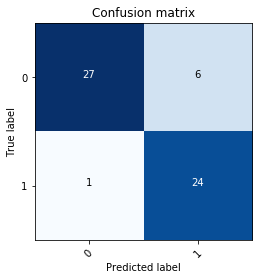

Métricas del modelo: 

Exactitud: 87.93%
Precisión: 80.00%
Sensibilidad: 96.00%
Puntaje F1: 87.27%

Alternativa con Classification_Report: 

              precision    recall  f1-score   support

           0       0.96      0.82      0.89        33
           1       0.80      0.96      0.87        25

    accuracy                           0.88        58
   macro avg       0.88      0.89      0.88        58
weighted avg       0.89      0.88      0.88        58



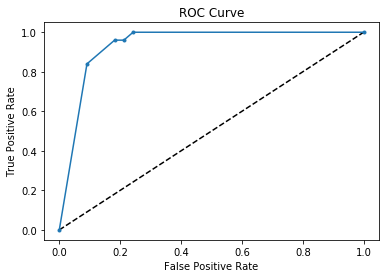

AUC: 93.64%


In [14]:
knn = Classification_Metrics(knn_cv, X_test, y_test, y_test.unique())


# Logistic Regression

<p  style="text-align:justify" >Aplicamos el método de Regresión Logística por medio del clasificador <i>LogisticRegression()</i> obtenido de los módulos de <i>sklearn</i>, construimos un <i>Pipeline</i>, primero con el comando de escalamiento de datos para posteriormente aplicar el clasificador, definimos nuestros parámetros del clasificador para realizar una búsqueda exhaustiva con validación cruzada, con un valor de $k=10$, para realizar la búsqueda utilizamos el comando <i>GridSearchCV()</i> para encontrar los mejores parámetros para nuestro modelo de clasificación de regresión logística.</p>
<p  style="text-align:justify" >Después de realizar la validación de parámetros debemos entrenar nuestro modelo con el conjunto de datos de entrenamiento.</p>

In [15]:
# Pipeline
steps = [('scaler', StandardScaler()), 
         ('logreg', LogisticRegression())]
pipeline = Pipeline(steps)
# Hyperparameters
parameters = {'logreg__C': np.logspace(-3,3,7),
              'logreg__penalty': ["l1","l2"]}
# Cross Validation
logreg_cv = GridSearchCV(pipeline, parameters, cv=10)
# Fit model
logreg_cv.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logreg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
         

In [16]:
print("Mejores Parámetros del modelo: {}".format(logreg_cv.best_params_))


Mejores Parámetros del modelo: {'logreg__C': 0.1, 'logreg__penalty': 'l2'}


#### Métricas de Evaluación de Clasificación (Confusion Matrix, Accuracy, Precision, Recall, F1, ROC y AUC)

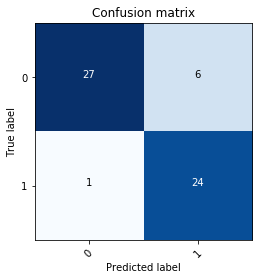

Métricas del modelo: 

Exactitud: 87.93%
Precisión: 80.00%
Sensibilidad: 96.00%
Puntaje F1: 87.27%

Alternativa con Classification_Report: 

              precision    recall  f1-score   support

           0       0.96      0.82      0.89        33
           1       0.80      0.96      0.87        25

    accuracy                           0.88        58
   macro avg       0.88      0.89      0.88        58
weighted avg       0.89      0.88      0.88        58



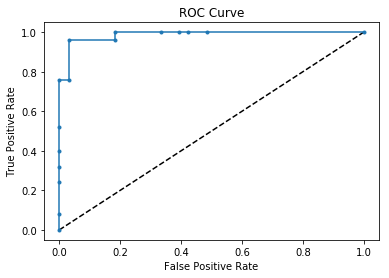

AUC: 98.67%


In [17]:
logreg = Classification_Metrics(logreg_cv, X_test, y_test, y_test.unique())


# Neural Network

<p  style="text-align:justify" >Aplicamos el método de Redes Neuronales por medio del clasificador <i>MLPClassifier()</i> obtenido de los módulos de <i>sklearn</i>, construimos un <i>Pipeline</i>, primero con el comando de escalamiento de datos para posteriormente aplicar el clasificador, definimos nuestros parámetros del clasificador para realizar una búsqueda exhaustiva con validación cruzada, con un valor de $k=10$, para realizar la búsqueda utilizamos el comando <i>GridSearchCV()</i> para encontrar los mejores parámetros para nuestro modelo de clasificación.</p>
<p  style="text-align:justify" >Después de realizar la validación de parámetros debemos entrenar nuestro modelo con el conjunto de datos de entrenamiento.</p>

In [18]:
# Pipeline
steps = [('scaler', StandardScaler()), 
         ('MLPC',  MLPClassifier())]
pipeline = Pipeline(steps)
# Hyperparameters
parameters = {'MLPC__activation': ['logistic', 'tanh'],
              'MLPC__solver': ['lbfgs'], 
              'MLPC__alpha': 10.0 ** -np.arange(1, 10),
              'MLPC__hidden_layer_sizes':np.arange(10, 15)}
# Cross Validation
MLPC_cv = GridSearchCV(pipeline, parameters, cv=10)
# Fit model
MLPC_cv.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('MLPC',
                                        MLPClassifier(activation='relu',
                                                      alpha=0.0001,
                                                      batch_size='auto',
                                                      beta_1=0.9, beta_2=0.999,
                                                      early_stopping=False,
                                                      epsilon=1e-08,
                                                      hidden_layer_sizes=(100,),
                                                      learning_rate='constant',
           

In [19]:
print("Mejores Parámetros del modelo: {}".format(MLPC_cv.best_params_))


Mejores Parámetros del modelo: {'MLPC__hidden_layer_sizes': 13, 'MLPC__solver': 'lbfgs', 'MLPC__alpha': 1e-06, 'MLPC__activation': 'logistic'}


#### Métricas de Evaluación de Clasificación (Confusion Matrix, Accuracy, Precision, Recall, F1, ROC y AUC)

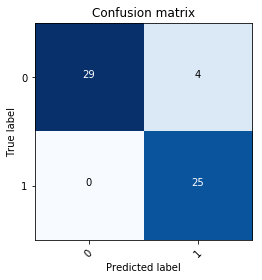

Métricas del modelo: 

Exactitud: 93.10%
Precisión: 86.21%
Sensibilidad: 100.00%
Puntaje F1: 92.59%

Alternativa con Classification_Report: 

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        33
           1       0.86      1.00      0.93        25

    accuracy                           0.93        58
   macro avg       0.93      0.94      0.93        58
weighted avg       0.94      0.93      0.93        58



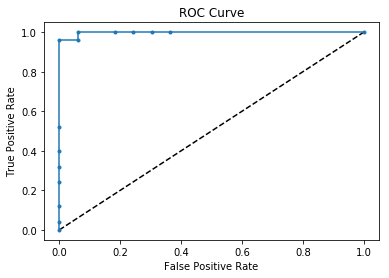

AUC: 99.76%


In [20]:
nn =  Classification_Metrics(MLPC_cv, X_test, y_test, y_test.unique())


# Support Vector Machine

<p  style="text-align:justify" >Aplicamos el método de Máquina de Soporte Vectorial por medio del clasificador <i>SVC()</i> obtenido de los módulos de <i>sklearn</i>, construimos un <i>Pipeline</i>, primero con el comando de escalamiento de datos para posteriormente aplicar el clasificador, definimos nuestros parámetros del clasificador para realizar una búsqueda exhaustiva con validación cruzada, con un valor de <i>k</i>=10, para realizar la búsqueda utilizamos el comando <i>GridSearchCV()</i> proveniente de los módulos de sklearn para encontrar los mejores parámetros para nuestro modelo de clasificación.</p>
<p  style="text-align:justify" >Después de realizar la validación de parámetros debemos entrenar nuestro modelo con el conjunto de datos de entrenamiento.</p>

In [21]:
# Pipeline
steps = [('scaler', StandardScaler()), 
         ('SVM', SVC())]
pipeline = Pipeline(steps)
# Hyperparameters
parameters = {'SVM__kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
              'SVM__C':[1, 10, 100],
              'SVM__gamma': [0.1, 0.01],
              'SVM__probability': [True]}
# Cross Validation
SVM_cv = GridSearchCV(pipeline, parameters, cv=10)
# Fit Model
SVM_cv.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('SVM',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.00

In [22]:
print("Mejores Parámetros del modelo: {}".format(SVM_cv.best_params_))


Mejores Parámetros del modelo: {'SVM__gamma': 0.1, 'SVM__probability': True, 'SVM__C': 1, 'SVM__kernel': 'sigmoid'}


#### Métricas de Evaluación de Clasificación (Confusion Matrix, Accuracy, Precision, Recall, F1, ROC y AUC)

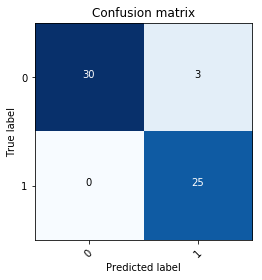

Métricas del modelo: 

Exactitud: 94.83%
Precisión: 89.29%
Sensibilidad: 100.00%
Puntaje F1: 94.34%

Alternativa con Classification_Report: 

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        33
           1       0.89      1.00      0.94        25

    accuracy                           0.95        58
   macro avg       0.95      0.95      0.95        58
weighted avg       0.95      0.95      0.95        58



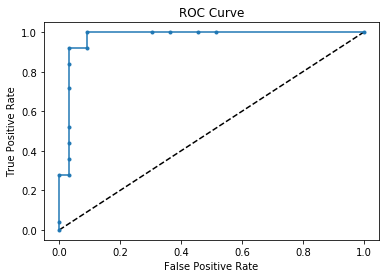

AUC: 97.33%


In [23]:
svm =  Classification_Metrics(SVM_cv, X_test, y_test, y_test.unique())


# Decision Tree Classifier

<p  style="text-align:justify" >Aplicamos el método de Clasificación y Árboles de Regresiones por medio del clasificador <i>DecisionTreeClassifier()</i> obtenido de los módulos de <i>sklearn</i>, construimos un <i>Pipeline</i>, primero con el comando de escalamiento de datos para posteriormente aplicar el clasificador, definimos nuestros parámetros del clasificador para realizar una búsqueda exhaustiva con validación cruzada, con un valor de <i>k</i>=10, para realizar la búsqueda utilizamos el comando <i>GridSearchCV()</i> para encontrar los mejores parámetros para nuestro modelo de clasificación.</p>
<p  style="text-align:justify" >Después de realizar la validación de parámetros debemos entrenar nuestro modelo con el conjunto de datos de entrenamiento.</p>

In [24]:
# Pipeline
steps = [('scaler', StandardScaler()),
         ('CART', DecisionTreeClassifier())] #
pipeline = Pipeline(steps)
# Hyperparameters
parameters = { "CART__criterion" : ['gini', 'entropy'],
              "CART__max_depth" : [4,6,8,12]}
# Cross Validation
CART_cv = GridSearchCV(pipeline, parameters, cv=10)
# Fit Model
CART_cv.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('CART',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                   

In [25]:
print("Mejores Parámetros del modelo: {}".format(CART_cv.best_params_))


Mejores Parámetros del modelo: {'CART__criterion': 'entropy', 'CART__max_depth': 4}


#### Métricas de Evaluación de Clasificación (Confusion Matrix, Accuracy, Precision, Recall, F1, ROC y AUC)

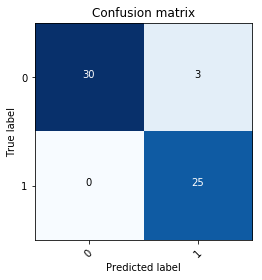

Métricas del modelo: 

Exactitud: 94.83%
Precisión: 89.29%
Sensibilidad: 100.00%
Puntaje F1: 94.34%

Alternativa con Classification_Report: 

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        33
           1       0.89      1.00      0.94        25

    accuracy                           0.95        58
   macro avg       0.95      0.95      0.95        58
weighted avg       0.95      0.95      0.95        58



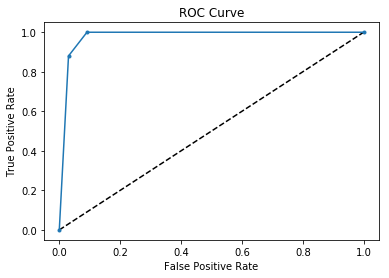

AUC: 97.94%


In [26]:
cart =  Classification_Metrics(CART_cv, X_test, y_test, y_test.unique())


# Naive Bayes

<p  style="text-align:justify" >Aplicamos el método de Naive Bayes por medio del clasificador <i>GaussianNB()</i> obtenido de los módulos de <i>sklearn</i>, en este caso no es recomendable usar la validación cruzada de párametros ya que puede alenta el processo de computación y al ser un algoritmo de clasificación tan simple no es necesario. <br><br>
Construimos nuestro modelo de clasificación bayeseana con nuestro conjunto de entranamiento.</p>

In [27]:
# Naive Bayes classifier
GNB = GaussianNB()
#Train the model using the training sets
GNB.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

#### Métricas de Evaluación de Clasificación (Confusion Matrix, Accuracy, Precision, Recall, F1, ROC y AUC)

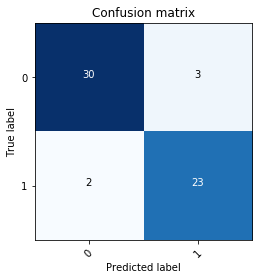

Métricas del modelo: 

Exactitud: 91.38%
Precisión: 88.46%
Sensibilidad: 92.00%
Puntaje F1: 90.20%

Alternativa con Classification_Report: 

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        33
           1       0.88      0.92      0.90        25

    accuracy                           0.91        58
   macro avg       0.91      0.91      0.91        58
weighted avg       0.91      0.91      0.91        58



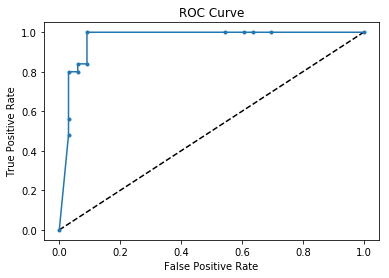

AUC: 96.61%


In [28]:
gnb =  Classification_Metrics(GNB, X_test, y_test, y_test.unique())


<br><br>

## Conclusión

In [30]:
d = {
     "Classifier" : ["K-NN", "Log-Reg", "Neu-Net", "SVM", "CART", "G-NB"],
     "Accuracy": [knn["accuracy"], logreg["accuracy"], nn["accuracy"], 
                  svm["accuracy"], cart["accuracy"], gnb["accuracy"]],
     "Precision": [knn["precision"], logreg["precision"], nn["precision"], 
                   svm["precision"], cart["precision"], gnb["precision"]],
     "Recall": [knn["recall"], logreg["recall"], nn["recall"], svm["recall"], 
                cart["recall"], gnb["recall"]],
     "F1": [knn["f1"], logreg["f1"], nn["f1"], svm["f1"], cart["f1"], gnb["f1"]],
     "AUC": [knn["AUC"], logreg["AUC"], nn["AUC"], svm["AUC"], cart["f1"], gnb["f1"]]
    }

df_scores = pd.DataFrame(d)
df_scores = df_scores.set_index(["Classifier"])
df_scores = df_scores.sort_values(by=['F1'], ascending=False)
df_scores


,AUC,Accuracy,F1,Precision,Recall
Classifier,,,,,
SVM,0.973333,0.948276,0.943396,0.892857,1.00
CART,0.943396,0.948276,0.943396,0.892857,1.00
Neu-Net,0.997576,0.931034,0.925926,0.862069,1.00
G-NB,0.901961,0.913793,0.901961,0.884615,0.92
K-NN,0.936364,0.879310,0.872727,0.800000,0.96
Log-Reg,0.986667,0.879310,0.872727,0.800000,0.96


<p  style="text-align:justify" >Utilizando las medidas de calidad podemos obtener una comparación de los clasificadores, obtenemos que el clasificador con mayor puntaje <i>F1</i> es el método de <i>Clasificador de Árboles de Regresión</i>, el segundo mejor fue el método de <i>Redes Neuronales</i>, seguido de <i>Máquina de Soporte Vectorial</i>,<i>Clasificador Bayesiano</i>, <i>K - Vecinos más cercanos</i> y por último <i>Regresión Logística</i>. El mejor clasificador fue <i>CART</i> porque es un método que permite cortar ramas de ábol por medio de algoritmos voraces tiene una mayor precisión en la predicción de una clase binaria. Además de obtener mejores resultados en todas sus medidas de calidad en comparación a los otros clasificadores.</p>

<p style="text-align:justify">El proyecto funciona para aplicar todo lo visto previamente durante todo el curso y con el apoyo de los cursos de <i>DataCamp</i>, además de ser esta materia una continuidad directa de <i>Aprendizaje estadístico</i>, los temas quedaron mejor entendidos y se aplicaron todas las técnicas aprendidas a lo largo de los cursos, además de aplicar lo visto en el primer parcial para procesar e interpretar de mejor manera los datos para poder construir correctamente matrices y vectores de características para poder clasificarlos en clases de acuerdo a modelos de aprendizaje supervidado con una mayor precisión y mejor estructura de trabajo.</p>

### Referencias Bibliográficas

<ul>
    <li>
        <ol type="a">
            <li>Source:  Congressional Quarterly Almanac, 98th Congress, 
                 2nd session 1984, Volume XL: Congressional Quarterly Inc. 
                Washington, D.C., 1985.</li>
            <li>Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)</li>
            <li>Date: 27 April 1987</li>
            <li>Url: <a href="https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records" target="_blank"> Congressional Voting Records Data Set </a></li>
        </ol>
    </li>
    <li>Onel Harrison. (2018). Machine Learning Basics with the K-Nearest Neighbors Algorithm. (Mayo 23, 2020), de Towards Data Science Sitio web: <a href="https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761" target="_blank">URL</a></li>
    <li> Saishruthi Swaminathan. (2018). Logistic Regression — Detailed Overview. (Mayo 23, 2020), de Towards Data Science Sitio web:  <a href="https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc" target="_blank">URL</a></li>
    <li>
     Tony Yiu. (2019). Understanding Neural Networks. (Mayo 23, 2020), de Towards Data Science Sitio web:  <a href="https://towardsdatascience.com/understanding-neural-networks-19020b758230" target="_blank">URL</a></li>
    <li>
     Ajay Yadav. (2018). SUPPORT VECTOR MACHINES(SVM). (Mayo 23, 2020), de Towards Data Science Sitio web:  <a href="https://towardsdatascience.com/support-vector-machines-svm-c9ef22815589" target="_blank">URL</a></li>
    <li> Desconocido. (Desconocido). Arboles de Decisión - Parte I. (Mayor 23, 2020), de bookdown Sitio web: <a href="https://bookdown.org/content/2031/arboles-de-decision-parte-i.html" target="_blank">URL</a></li>
    <li> Rohith Gandhi. (2018). Naive Bayes Classifier. (Mayo 23, 2020), de Towards Data Science Sitio web: <a href="https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c" target="_blank">URL</a></li>
    <li>  Desconocido. (Desconocido). Machine Learning: Seleccion Metricas de clasificacion. (Mayo 23, 2020), de Sitio Big Data Sitio web: <a href="https://sitiobigdata.com/2019/01/19/machine-learning-metrica-clasificacion-parte-3/#" target="_blank">URL</a></li>

</ul>